In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.offsetbox import AnchoredText

### Bring in data from a few select stations and plot the time series (to illustrate the frontal passage at multiple locations)

In [18]:
#Stations to plot: KCYS; STN01; KAKO; GLY04; FCC01; NREL

######## get data and prep

#### 1-minute asos
asos = pd.read_csv("https://mesonet.agron.iastate.edu/cgi-bin/request/asos1min.py?station=AKO&station=CYS&station=SNY&station=LIC&station=DEN&tz=UTC&year1=2022&month1=12&day1=21&hour1=0&minute1=0&year2=2022&month2=12&day2=23&hour2=22&minute2=0&vars=tmpf&sample=1min&what=download&delim=comma&gis=yes",
                   parse_dates=['valid(UTC)'])
    
asos['datetime'] = asos['valid(UTC)'].dt.tz_localize("UTC")
asos = asos.sort_values('datetime')
asos.set_index("datetime", inplace=True)

### F to C
asos['tmpc'] = (pd.to_numeric(asos['tmpf'],errors='coerce')-32.)/1.8

### subset down in time
asos = asos['2022-12-21 17:00':'2022-12-22 02:30'] 
asos



,station,station_name,lat,lon,valid(UTC),tmpf,tmpc
datetime,,,,,,,
2022-12-21 17:00:00+00:00,SNY,SIDNEY,41.1014,-102.9847,2022-12-21 17:00:00,27,-2.777778
2022-12-21 17:00:00+00:00,DEN,DENVER INTNL ARPT,39.8328,-104.6575,2022-12-21 17:00:00,42,5.555556
2022-12-21 17:00:00+00:00,LIC,LIMON MUNICIPAL,39.2748,-103.6659,2022-12-21 17:00:00,31,-0.555556
2022-12-21 17:00:00+00:00,CYS,CHEYENNE/WARREN AFB,41.1556,-104.8105,2022-12-21 17:00:00,38,3.333333
2022-12-21 17:00:00+00:00,AKO,AKRON/WASHINGTON CO,40.1756,-103.2220,2022-12-21 17:00:00,33,0.555556
...,...,...,...,...,...,...,...
2022-12-22 02:30:00+00:00,CYS,CHEYENNE/WARREN AFB,41.1556,-104.8105,2022-12-22 02:30:00,-14,-25.555556
2022-12-22 02:30:00+00:00,LIC,LIMON MUNICIPAL,39.2748,-103.6659,2022-12-22 02:30:00,-6,-21.111111
2022-12-22 02:30:00+00:00,SNY,SIDNEY,41.1014,-102.9847,2022-12-22 02:30:00,-12,-24.444444


In [19]:
### CoAgMET
#coag = pd.read_csv("https://coagmet.colostate.edu/data/5min.csv?header=yes&from=2022-12-21&tz=utc&units=m&fields=t&stations=fcc01,gly04,stn01",
#                   skiprows=[1], parse_dates=['Date and Time'])
### no FCC01
coag = pd.read_csv("https://coagmet.colostate.edu/data/5min.csv?header=yes&from=2022-12-21&tz=utc&units=m&fields=t&stations=gly04,stn01",
                  skiprows=[1], parse_dates=['Date and Time'])

meta = pd.read_csv("https://coagmet.colostate.edu/data/metadata.csv?header=yes")
coag = coag.merge(meta)

coag.replace(-999.,np.nan,inplace=True)
coag['datetime'] = pd.to_datetime(coag['Date and Time']).dt.tz_localize("UTC")
coag = coag.sort_values(by='datetime')
coag.set_index(['datetime'],inplace=True)

### subset down in time
coag = coag['2022-12-21 17:00':'2022-12-22 02:30'] 

coag


,Station,Date and Time,Air Temp,Name,Location,Latitude (degN),Longitude (degE),Elevation (ft),Anemometer Height (m),Active,Irrigation,First Observation,Last Observation,Timestep (s),Network
datetime,,,,,,,,,,,,,,,
2022-12-21 17:00:00+00:00,stn01,2022-12-21 17:00:00,4.91,Stratton,Stratton,39.2987,-102.522,4321,3,active,dry,04/02/2006,06/29/2024,300,Coag
2022-12-21 17:00:00+00:00,gly04,2022-12-21 17:00:00,-1.26,Greeley 4,1.5 mi N of Greeley Airport,40.4487,-104.638,4683,2,active,full,06/05/2008,06/29/2024,300,Coag
2022-12-21 17:05:00+00:00,gly04,2022-12-21 17:05:00,-0.97,Greeley 4,1.5 mi N of Greeley Airport,40.4487,-104.638,4683,2,active,full,06/05/2008,06/29/2024,300,Coag
2022-12-21 17:05:00+00:00,stn01,2022-12-21 17:05:00,5.00,Stratton,Stratton,39.2987,-102.522,4321,3,active,dry,04/02/2006,06/29/2024,300,Coag
2022-12-21 17:10:00+00:00,stn01,2022-12-21 17:10:00,5.69,Stratton,Stratton,39.2987,-102.522,4321,3,active,dry,04/02/2006,06/29/2024,300,Coag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22 02:20:00+00:00,stn01,2022-12-22 02:20:00,-21.32,Stratton,Stratton,39.2987,-102.522,4321,3,active,dry,04/02/2006,06/29/2024,300,Coag
2022-12-22 02:25:00+00:00,stn01,2022-12-22 02:25:00,-21.27,Stratton,Stratton,39.2987,-102.522,4321,3,active,dry,04/02/2006,06/29/2024,300,Coag
2022-12-22 02:25:00+00:00,gly04,2022-12-22 02:25:00,-20.32,Greeley 4,1.5 mi N of Greeley Airport,40.4487,-104.638,4683,2,active,full,06/05/2008,06/29/2024,300,Coag


In [20]:
### and NWTC 2-m temperature data
nrel = pd.read_csv("https://midcdmz.nrel.gov/apps/plot.pl?site=NWTC&start=20010824&edy=19&emo=12&eyr=2023&year=2022&month=12&day=21&endyear=2022&endmonth=12&endday=24&time=0&inst=7&type=data&wrlevel=2&preset=0&first=3&math=0&second=-1&value=0.0&user=0&axis=1",
                  parse_dates=[["DATE (MM/DD/YYYY)","MST"]])

nrel['datetime'] = pd.to_datetime(nrel["DATE (MM/DD/YYYY)_MST"]).dt.tz_localize("Etc/GMT+7")
nrel['datetime'] = nrel['datetime'].dt.tz_convert("UTC")

nrel.set_index(['datetime'],inplace=True)

#nrel.rename({"Temperature @ 2m [deg C]":"tmpc"})

### subset down in time
nrel = nrel['2022-12-21 17:00':'2022-12-22 02:30'] 

nrel



,DATE (MM/DD/YYYY)_MST,Temperature @ 2m [deg C]
datetime,,
2022-12-21 17:00:00+00:00,2022-12-21 10:00:00,6.105
2022-12-21 17:01:00+00:00,2022-12-21 10:01:00,6.167
2022-12-21 17:02:00+00:00,2022-12-21 10:02:00,6.101
2022-12-21 17:03:00+00:00,2022-12-21 10:03:00,6.090
2022-12-21 17:04:00+00:00,2022-12-21 10:04:00,6.143
...,...,...
2022-12-22 02:26:00+00:00,2022-12-21 19:26:00,-20.480
2022-12-22 02:27:00+00:00,2022-12-21 19:27:00,-20.470
2022-12-22 02:28:00+00:00,2022-12-21 19:28:00,-20.500


### now plot them

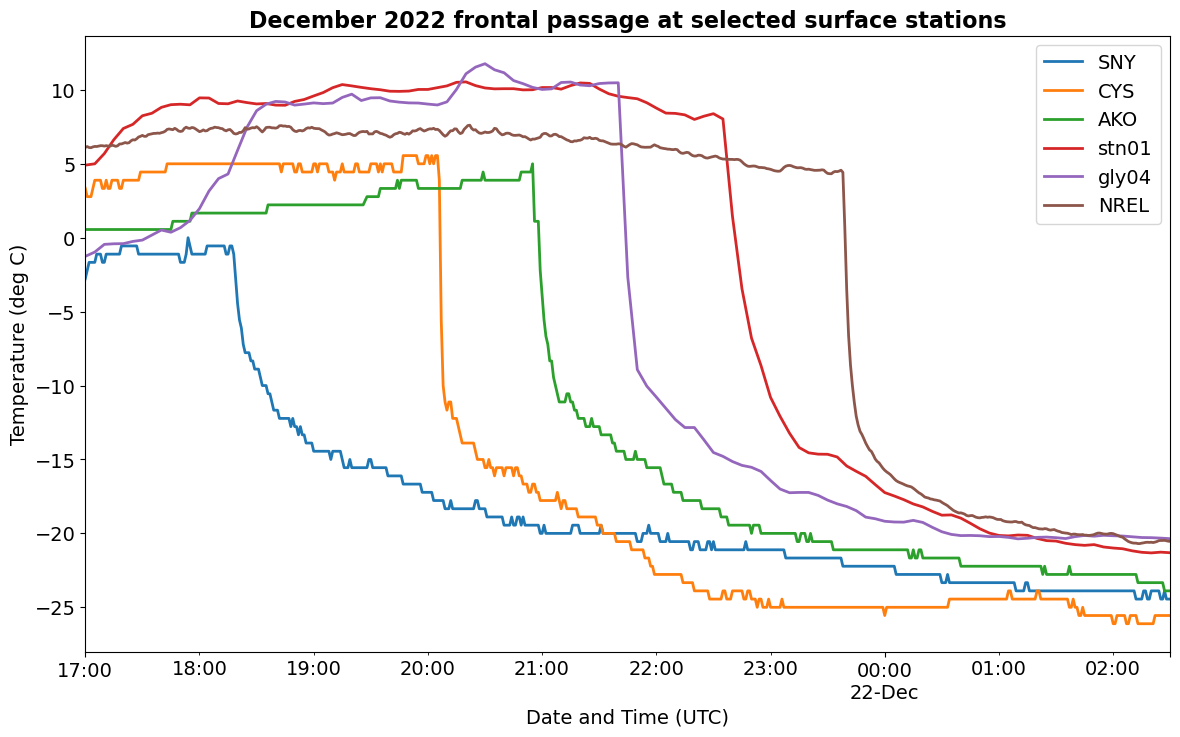

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))

#for stn in asos.station.unique():
#for stn in ["SNY","CYS","AKO","DEN","LIC"]:
for stn in ["SNY","CYS","AKO"]:
    asos[asos['station']==stn]['tmpc'].plot(ax=ax, lw=2, label=stn)
    
for stn in coag.Station.unique():
    coag[coag['Station']==stn]['Air Temp'].plot(ax=ax, lw=2, label=stn)
    
nrel["Temperature @ 2m [deg C]"].plot(ax=ax, lw=2,label='NREL')

ax.set_title("December 2022 frontal passage at selected surface stations",fontsize=16,fontweight='bold')
ax.set_xlabel("Date and Time (UTC)", fontsize=14)
ax.set_ylabel("Temperature (deg C)",fontsize=14)
ax.tick_params(axis='both', which='both',labelsize=14)

ax.legend(fontsize=14)

fig.savefig("sfcobs_select_tser.pdf", 
            facecolor='white', transparent=False, bbox_inches='tight')

plt.show()

plt.close('all')

In [22]:
coag.set_index([coag.index,"Station"],inplace=True)
coag

Date and Time  Air Temp       Name  \
datetime                  Station                                            
2022-12-21 17:00:00+00:00 stn01   2022-12-21 17:00:00      4.91   Stratton   
                          gly04   2022-12-21 17:00:00     -1.26  Greeley 4   
2022-12-21 17:05:00+00:00 gly04   2022-12-21 17:05:00     -0.97  Greeley 4   
                          stn01   2022-12-21 17:05:00      5.00   Stratton   
2022-12-21 17:10:00+00:00 stn01   2022-12-21 17:10:00      5.69   Stratton   
...                                               ...       ...        ...   
2022-12-22 02:20:00+00:00 stn01   2022-12-22 02:20:00    -21.32   Stratton   
2022-12-22 02:25:00+00:00 stn01   2022-12-22 02:25:00    -21.27   Stratton   
                          gly04   2022-12-22 02:25:00    -20.32  Greeley 4   
2022-12-22 02:30:00+00:00 gly04   2022-12-22 02:30:00    -20.36  Greeley 4   
                          stn01   2022-12-22 02:30:00    -21.31   Stratton   

                                                      Location  \
datetime                  Station                                
2022-12-21 17:00:00+00:00 stn01                       Stratton   
                          gly04    1.5 mi N of Greeley Airport   
2022-12-21 17:05:00+00:00 gly04    1.5 mi N of Greeley Airport   
                          stn01                       Stratton   
2022-12-21 17:10:00+00:00 stn01                       Stratton   
...                                                        ...   
2022-12-22 02:20:00+00:00 stn01                       Stratton   
2022-12-22 02:25:00+00:00 stn01                       Stratton   
                          gly04    1.5 mi N of Greeley Airport   
2022-12-22 02:30:00+00:00 gly04    1.5 mi N of Greeley Airport   
                          stn01                       Stratton   

                                   Latitude (degN)  Longitude (degE)  \
datetime                  Station                                      
2022-12-21 17:00:00+00:00 stn01            39.2987          -102.522   
                          gly04            40.4487          -104.638   
2022-12-21 17:05:00+00:00 gly04            40.4487          -104.638   
                          stn01            39.2987          -102.522   
2022-12-21 17:10:00+00:00 stn01            39.2987          -102.522   
...                                            ...               ...   
2022-12-22 02:20:00+00:00 stn01            39.2987          -102.522   
2022-12-22 02:25:00+00:00 stn01            39.2987          -102.522   
                          gly04            40.4487          -104.638   
2022-12-22 02:30:00+00:00 gly04            40.4487          -104.638   
                          stn01            39.2987          -102.522   

                                   Elevation (ft)  Anemometer Height (m)  \
datetime                  Station                                          
2022-12-21 17:00:00+00:00 stn01              4321                      3   
                          gly04              4683                      2   
2022-12-21 17:05:00+00:00 gly04              4683                      2   
                          stn01              4321                      3   
2022-12-21 17:10:00+00:00 stn01              4321                      3   
...                                           ...                    ...   
2022-12-22 02:20:00+00:00 stn01              4321                      3   
2022-12-22 02:25:00+00:00 stn01              4321                      3   
                          gly04              4683                      2   
2022-12-22 02:30:00+00:00 gly04              4683                      2   
                          stn01              4321                      3   

                                   Active Irrigation First Observation  \
datetime                  Station                                        
2022-12-21 17:00:00+00:00 stn01    active        dry        04/02/2006   
                  

In [23]:
coag['shifted_30min'] = coag.unstack().shift(30, freq='min').stack()['Air Temp']
coag['shifted_60min'] = coag.unstack().shift(60, freq='min').stack()['Air Temp']
coag['shifted_90min'] = coag.unstack().shift(90, freq='min').stack()['Air Temp']

coag['Tchange_30min'] = coag['shifted_30min'] - coag['Air Temp']
coag['Tchange_60min'] = coag['shifted_60min'] - coag['Air Temp']
coag['Tchange_90min'] = coag['shifted_90min'] - coag['Air Temp']

In [24]:
coag.sort_values(by='Tchange_30min',ascending=False)

Date and Time  Air Temp       Name  \
datetime                  Station                                            
2022-12-21 22:10:00+00:00 gly04   2022-12-21 22:10:00    -12.30  Greeley 4   
2022-12-21 22:05:00+00:00 gly04   2022-12-21 22:05:00    -11.54  Greeley 4   
2022-12-21 22:00:00+00:00 gly04   2022-12-21 22:00:00    -10.78  Greeley 4   
2022-12-21 21:55:00+00:00 gly04   2022-12-21 21:55:00    -10.04  Greeley 4   
2022-12-21 23:05:00+00:00 stn01   2022-12-21 23:05:00    -12.08   Stratton   
...                                               ...       ...        ...   
2022-12-21 17:15:00+00:00 gly04   2022-12-21 17:15:00     -0.41  Greeley 4   
2022-12-21 17:20:00+00:00 stn01   2022-12-21 17:20:00      7.39   Stratton   
                          gly04   2022-12-21 17:20:00     -0.40  Greeley 4   
2022-12-21 17:25:00+00:00 gly04   2022-12-21 17:25:00     -0.25  Greeley 4   
                          stn01   2022-12-21 17:25:00      7.67   Stratton   

                                                      Location  \
datetime                  Station                                
2022-12-21 22:10:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 22:05:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 22:00:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 21:55:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 23:05:00+00:00 stn01                       Stratton   
...                                                        ...   
2022-12-21 17:15:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 17:20:00+00:00 stn01                       Stratton   
                          gly04    1.5 mi N of Greeley Airport   
2022-12-21 17:25:00+00:00 gly04    1.5 mi N of Greeley Airport   
                          stn01                       Stratton   

                                   Latitude (degN)  Longitude (degE)  \
datetime                  Station                                      
2022-12-21 22:10:00+00:00 gly04            40.4487          -104.638   
2022-12-21 22:05:00+00:00 gly04            40.4487          -104.638   
2022-12-21 22:00:00+00:00 gly04            40.4487          -104.638   
2022-12-21 21:55:00+00:00 gly04            40.4487          -104.638   
2022-12-21 23:05:00+00:00 stn01            39.2987          -102.522   
...                                            ...               ...   
2022-12-21 17:15:00+00:00 gly04            40.4487          -104.638   
2022-12-21 17:20:00+00:00 stn01            39.2987          -102.522   
                          gly04            40.4487          -104.638   
2022-12-21 17:25:00+00:00 gly04            40.4487          -104.638   
                          stn01            39.2987          -102.522   

                                   Elevation (ft)  Anemometer Height (m)  \
datetime                  Station                                          
2022-12-21 22:10:00+00:00 gly04              4683                      2   
2022-12-21 22:05:00+00:00 gly04              4683                      2   
2022-12-21 22:00:00+00:00 gly04              4683                      2   
2022-12-21 21:55:00+00:00 gly04              4683                      2   
2022-12-21 23:05:00+00:00 stn01              4321                      3   
...                                           ...                    ...   
2022-12-21 17:15:00+00:00 gly04              4683                      2   
2022-12-21 17:20:00+00:00 stn01              4321                      3   
                          gly04              4683                      2   
2022-12-21 17:25:00+00:00 gly04              4683                      2   
                          stn01              4321                      3   

                                   Active Irrigation First Observation  \
datetime                  Station                                        
2022-12-21 22:10:00+00:00 gly04    active       full        06/05/2008   
2022-12-21 22:05:0

In [25]:
coag.sort_values(by='Tchange_60min',ascending=False)

Date and Time  Air Temp       Name  \
datetime                  Station                                            
2022-12-21 22:40:00+00:00 gly04   2022-12-21 22:40:00    -15.14  Greeley 4   
2022-12-21 22:35:00+00:00 gly04   2022-12-21 22:35:00    -14.79  Greeley 4   
2022-12-21 22:30:00+00:00 gly04   2022-12-21 22:30:00    -14.53  Greeley 4   
2022-12-21 22:25:00+00:00 gly04   2022-12-21 22:25:00    -13.67  Greeley 4   
2022-12-21 22:15:00+00:00 gly04   2022-12-21 22:15:00    -12.84  Greeley 4   
...                                               ...       ...        ...   
2022-12-21 17:45:00+00:00 gly04   2022-12-21 17:45:00      0.37  Greeley 4   
2022-12-21 17:50:00+00:00 stn01   2022-12-21 17:50:00      9.03   Stratton   
                          gly04   2022-12-21 17:50:00      0.68  Greeley 4   
2022-12-21 17:55:00+00:00 stn01   2022-12-21 17:55:00      8.99   Stratton   
                          gly04   2022-12-21 17:55:00      1.17  Greeley 4   

                                                      Location  \
datetime                  Station                                
2022-12-21 22:40:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 22:35:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 22:30:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 22:25:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 22:15:00+00:00 gly04    1.5 mi N of Greeley Airport   
...                                                        ...   
2022-12-21 17:45:00+00:00 gly04    1.5 mi N of Greeley Airport   
2022-12-21 17:50:00+00:00 stn01                       Stratton   
                          gly04    1.5 mi N of Greeley Airport   
2022-12-21 17:55:00+00:00 stn01                       Stratton   
                          gly04    1.5 mi N of Greeley Airport   

                                   Latitude (degN)  Longitude (degE)  \
datetime                  Station                                      
2022-12-21 22:40:00+00:00 gly04            40.4487          -104.638   
2022-12-21 22:35:00+00:00 gly04            40.4487          -104.638   
2022-12-21 22:30:00+00:00 gly04            40.4487          -104.638   
2022-12-21 22:25:00+00:00 gly04            40.4487          -104.638   
2022-12-21 22:15:00+00:00 gly04            40.4487          -104.638   
...                                            ...               ...   
2022-12-21 17:45:00+00:00 gly04            40.4487          -104.638   
2022-12-21 17:50:00+00:00 stn01            39.2987          -102.522   
                          gly04            40.4487          -104.638   
2022-12-21 17:55:00+00:00 stn01            39.2987          -102.522   
                          gly04            40.4487          -104.638   

                                   Elevation (ft)  Anemometer Height (m)  \
datetime                  Station                                          
2022-12-21 22:40:00+00:00 gly04              4683                      2   
2022-12-21 22:35:00+00:00 gly04              4683                      2   
2022-12-21 22:30:00+00:00 gly04              4683                      2   
2022-12-21 22:25:00+00:00 gly04              4683                      2   
2022-12-21 22:15:00+00:00 gly04              4683                      2   
...                                           ...                    ...   
2022-12-21 17:45:00+00:00 gly04              4683                      2   
2022-12-21 17:50:00+00:00 stn01              4321                      3   
                          gly04              4683                      2   
2022-12-21 17:55:00+00:00 stn01              4321                      3   
                          gly04              4683                      2   

                                   Active Irrigation First Observation  \
datetime                  Station                                        
2022-12-21 22:40:00+00:00 gly04    active       full        06/05/2008   
2022-12-21 22:35:0